# Aiyagari Model

This lecture note is primarily based on *The Aiyagari Model* from the
[Quantitative Economics with Julia](https://julia.quantecon.org/multi_agent_models/aiyagari.html)
website by Jesse Perla, Thomas J. Sargent, and John Stachurski. All errors herein are mine.

## Overview: Key ideas and ingredients

- (*Ex-ante* identical) Households face idiosyncratic ($\neq$ aggregate) risks $\Rightarrow$ Want to insure against the risk
- Market is incomplete (state-contingent securities are unavailable) $\Rightarrow$ Save to hedge against the risk (*precautionary savings*)
- Still cannot perfectly hedge against the risks due to *borrowing constraint*
- Households thus face *uninsurable risks* and are heterogeneous *ex-post*

### Examples of application:
- Optimal taxation or debt
- Income and wealth inequality
- etc.

### Households

Infinitely lived households / consumers face idiosyncratic income shocks.

A unit interval of  *ex ante* identical households face a common borrowing constraint.

The savings problem faced by a typical  household is

$$
\max \mathbb E \sum_{t=0}^{\infty} \beta^t u(c_t)
$$

subject to

$$
a_{t+1} + c_t \leq w z_t + (1 + r) a_t
\quad
c_t \geq 0,
\quad \text{and} \quad
a_t \geq -B
$$

where

- $ c_t $ is current consumption  
- $ a_t $ is assets  
- $ z_t $ is an exogenous component of labor income capturing stochastic unemployment risk, etc.  
- $ w $ is a wage rate  
- $ r $ is a net interest rate  
- $ B $ is the maximum amount that the agent is allowed to borrow  


The exogenous process $ \{z_t\} $ follows a finite state Markov chain with given stochastic matrix $ P $.

The wage and interest rate are fixed over time.

In this simple version of the model, households supply labor  inelastically because they do not value leisure.

<a id='bellman'></a>
The Bellman equation reads as:
$$
v(a,l) = \max_{a'\in[-\phi,D]} \left\{U(wz + (1+r)a - a') + \mathbb{E}[v(a',z')|l]\right\}~~~:D=wz + (1+r)a \tag{1}
$$


## Firms

Firms produce output by hiring capital and labor.

Firms act competitively and face constant returns to scale.

Since returns to scale are constant the number of firms does not matter.

Hence we can consider a single (but nonetheless competitive) representative firm.

The firm’s output is

$$
Y_t = A K_t^{\alpha} N^{1 - \alpha}
$$

where

- $ A $ and $ \alpha $ are parameters with $ A > 0 $ and $ \alpha \in (0, 1) $  
- $ K_t $ is aggregate capital  
- $ N $ is total labor supply (which is constant in this simple version of the model)  


The firm’s problem is

$$
max_{K, N} \left\{ A K_t^{\alpha} N^{1 - \alpha} - (r + \delta) K - w N \right\}
$$

The parameter $ \delta $ is the depreciation rate.

From the first-order condition with respect to capital, the firm’s inverse demand for capital is


<a id='equation-aiy-rgk'></a>
$$
r = A \alpha  \left( \frac{N}{K} \right)^{1 - \alpha} - \delta \tag{54.1}
$$

Using this expression and the firm’s first-order condition for labor, we can pin down
the equilibrium wage rate as a function of $ r $ as


<a id='equation-aiy-wgr'></a>
$$
w(r) = A  (1 - \alpha)  (A \alpha / (r + \delta))^{\alpha / (1 - \alpha)} \tag{54.2}
$$

### Equilibrium
**Definition (A Stationary Competitive Equilibrium)**  

A stationary competitive equilibrium consists of a policy function $a' = g(a,z)$, a value function $v$, a distribution $m(a,z)$, aggregate capital $K$, and prices $r, w$ such that:

- Given $w$ and $r$, $v$ solves the Bellman equation [(1)](#Bellman), and $a' = g(a,z)$ is the associated policy function.  
- Prices are determined competitively:  
  $r = F_K(K,L) - \delta$, &nbsp; $w = F_L(K,L)$.  
- The distribution $m(a,z)$ is stationary and associated with the policy function $g(a,z)$ and the invariant distribution of $z$, $\chi(z)$.  
- Markets clear:
  - $K = \int_a \int_z g(a,z) \, m(a,z) \, da \, dz$  
  - $L = \int_a \int_z z \cdot m(a,z) \, da \, dz$


### Comparison with the Complete Market Setting

**Complete Market Setting**

- $U'(c) = \beta (1+r)U'(c')$  
- $r = \frac{1}{\beta} - 1 \equiv \lambda$

**Aiyagari Model (Incomplete Market)**

- $U'(c)\;\ge\; \mathbb{E}[U'(c')](1+r)\beta$  
- Upward-sloping capital supply curve in $(r,k)$ space  
- $r < \lambda$: the equilibrium interest rate is less than in the complete market (intuition?)

### Algorithm
**Equilibrium Objects**:  
$v, \; g(a,z), \; \textcolor{red}{m(a,z)}, \; \textcolor{red}{K}, \; \textcolor{red}{r}, \; w$

1. Pick any $r_0 \in [-\delta,\lambda]$.  
   ($L$ is determined by the stationary distribution of effective labor, and then $w$ is determined without knowing the value of $K$.)  

2. Given $w$ and $r_0$, perform the household's optimization and obtain the policy function $a' = g(a,z)$.  

3. Based on $a' = g(a,z)$ and the stationary distribution over $z$, $\chi(z)$, compute $m(a,z)$, the stationary distribution over $(a,z)$ space.  

4. Given $a' = g(a,z)$ and $m(a,z)$, compute the implied aggregate saving, and compare it with capital demand.  

5. If they are close enough, stop the procedure. If not, update the guess of $r$, return to step 1, and repeat the procedure until convergence.  


### What's different from similar models without idiosyncratic risk
- Need to capture the income process in a discretized way
- Need to take expectation (household problem)
- Need to compute household distribution that is consistent with such income process, in solving equilibrium

### Discretizing AR(1) income process

To solve the household problem and equilibrium, we need to know:
- Transition matrix $P$, which approximates the AR(1) process characterized by parameters $(\rho,\sigma)$, where $\rho$ and $\sigma$ govern the persistence and volatility of the process.
- Invariant distribution of $z$, $\chi(z)$.

The well-known method is Tauchen (1986)'s method.


### Tauchen's Method: A Sketch

1. **Generate a state space**  
   $\mathcal{Z} = \{ z_1, \dots, z_n \}$ with $n$ equally spaced grid points supported on $[z_1, z_n]$.
   
   - Choose the number of grid points $n$.  
   - Set $z_{\min}$ and $z_{\max}$ as  

     $$
     z_1 = z_{\min} = E[\log(z)] - \omega \sigma_{\log z},
     $$
     $$
     z_n = z_{\max} = E[\log(z)] + \omega \sigma_{\log z}
     $$  

     where $\sigma_{\log z}^2$ denotes the variance of $\log(z)$.  

     The process  

     $$
     \log(z_{t+1}) = \rho \log(z_t) + \varepsilon_{t+1}, \qquad \varepsilon_{t+1}\sim \mathcal{N}(0,\sigma^2)
     $$  

     implies  

     $$
     \sigma_{\log z}^2 = \rho^2 \sigma_{\log z}^2 + \sigma^2
     $$  

     $$
     \Rightarrow (1-\rho^2)\sigma_{\log z}^2 = \sigma^2
     $$  
     $$
     \Rightarrow \sigma_{\log z} = \frac{\sigma}{\sqrt{1-\rho^2}}.
     $$  

     And since  

     $$
     E[\log(z)] = \rho E[\log(z)] \quad (\because E[\varepsilon]=0),
     $$  

     it follows that $E[\log(z)] = 0$.  

     Hence  

     $$
     z_1 = z_{\min} = - \omega \frac{\sigma}{\sqrt{1-\rho^2}}, \qquad
     z_n = z_{\max} = \omega \frac{\sigma}{\sqrt{1-\rho^2}}.
     $$  

   - Create a set of states $\{\log(z_k)\}_{k=1}^n$ such that $z_1 = z_{\min}$, $z_n = z_{\max}$, and $\{\log(z_k)\}_{k=2}^{n-1}$ are equally spaced in $[z_{\min}, z_{\max}]$.

---

2. **Obtain conditional probabilities**  
   Construct transition probabilities $P(\log(z' = z_j)\,|\,\log(z=z_i))$ for each $(i,j)$, yielding a transition matrix for labor productivity growth.  

   - Define  

     $$
     q = \frac{\log(z_n) - \log(z_1)}{n-1}.
     $$  

     Let $P$ be an $(n\times n)$ transition matrix with entries $P_{ij} = P(\log(z' = z_j) \mid \log(z = z_i))$, and let $\Phi(\cdot)$ denote the c.d.f. of $\mathcal{N}(0,1)$.  

     Transition probabilities are assigned so that for all $j \in \{1,\dots,n\}$:  

     - $P_{i1} = \Phi\!\left( \frac{\log(z_1) + q/2 - \log(z_i)}{\sigma} \right)$

     - $P_{ij} = \Phi\!\left( \frac{\log(z_j) + q/2 - \log(z_i)}{\sigma} \right) - 
                 \Phi\!\left( \frac{\log(z_j) - q/2 - \log(z_i)}{\sigma} \right),
                 \qquad i \in \{2,\dots,n-1\}$

     - $P_{in} = 1 - \Phi\!\left( \frac{\log(z_n) - q/2 - \log(z_i)}{\sigma} \right).$

   - This comes from  

     $$
     \frac{\log(z_{t+1}) - \rho \log(z_t)}{\sigma} \sim \mathcal{N}(0,1),
     $$  

     for each $\log(z_t)$.


In [89]:
# Tauchen's method
using Distributions

function tauchen(ρ,σ,n;ω=4.0)

    P = zeros(n,n) # transition matrix
    
    # step 1: discretize the space over z
    log_zmin = -ω*σ/sqrt(1-ρ^2)
    log_zmax =  ω*σ/sqrt(1-ρ^2)
    log_z = collect(LinRange(log_zmin,log_zmax,n)) # discretize log(z) space with equally spaced grid points
    z = exp.(log_z) # exponential back to use it in household problems

    # step 2: assign conditional probabilities
    q = (log_zmax-log_zmin)/(n-1)

    for i in 1:n
        for j in 1:n
            if (j==1)
                x = (log_z[j] + q/2 - ρ*log_z[i])/σ
                P[i,j] = cdf(Normal(0,1), x)
            elseif (j==n)
                x = (log_z[j] - q/2 - ρ*log_z[i])/σ
                P[i,j] = 1.0 - cdf(Normal(0,1), x)
            else
                x1 = (log_z[j] + q/2 - ρ*log_z[i])/σ
                x0 = (log_z[j] - q/2 - ρ*log_z[i])/σ
                P[i,j] = cdf(Normal(0,1), x1) - cdf(Normal(0,1), x0)
            end
        end
    end

    # step 3: compute invariant distribution
    χ = ones(1,n)./n # initial guess
    d = 1.0
    ε = 1.e-8
    iter = 1
    maxiter = 10000
    while (d>ε && iter<maxiter)
        χ_next = χ*P
        d = maximum(abs.(χ_next.-χ))
        χ=χ_next # update
        iter+=1
    end

    # @show d
    # @show iter
    return z,P,χ
end

tauchen (generic function with 1 method)

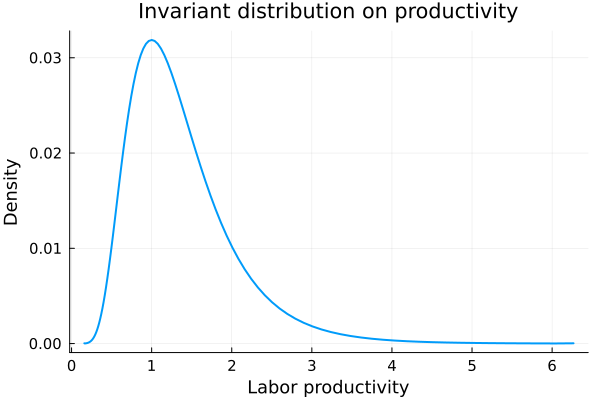

In [90]:
ρ=0.9
σ=0.2
n=101
z,P,χ = tauchen(ρ,σ,n;)

using Plots
plot(z, χ[:];
legend=false,
title="Invariant distribution on productivity",
xlabel="Labor productivity",                   
ylabel="Density",
linewidth=2,
guidefont=font(12),
tickfont=font(10),
legendfont=font(10))

In [161]:
# solve stationary equilibrium
using Printf

# parameters
# technology
α = 0.33
δ = 0.08
A = 0.3
# preference
β = 0.96
μ = 3.0
# income process
ρ = 0.2
σ = 0.4
nz = 5

# prices
r = 1/β-1
w = A*(1-α)*(A*α/(r+δ))^(α/(1-α))

# borrowing limit
b = 0.0 # no borrowing allowed

# discretize asset space
mina = b
maxa = 10.0
na   = 51
a    = collect(LinRange(mina,maxa,na))

# discretize income space and compute transition matrix
z,P,χ = tauchen(ρ,σ,nz;ω=2.0)
N = sum(z.*χ) # aggregate labor supply in efficiency unit

# value function and policy function
v = zeros(na,nz)
v_new = copy(v)
g = zeros(na,nz)
g_arg = ones(Int,na,nz)

# distribution
m  = zeros(na,nz)
ma = zeros(na) # asset distribution

# utility function
u(c) = c^(1-μ)/(1-μ)

# household problem
penalty = -1.e+10
v_temp = zeros(na)

dif=1.0
tol=1.e-5
it=1
maxit=20

while (dif>tol && it<maxit)

    d=1.0
    ε=1.e-5
    iter=1
    maxiter=1000

    while (d>ε && iter<maxiter)
        for zc in eachindex(z)
        for ac in eachindex(a)
            v0=penalty
            v_temp.=penalty
            for acc in eachindex(a)
                c = (1+r)*a[ac]-a[acc]+w*z[zc]
                if (c>0)
                    val=u(c)
                    for zcc in eachindex(z)
                        val += β*P[zc,zcc]*v[acc,zcc]
                    end
                else
                    val = penalty
                end

                v_temp[acc]=val

                if (val>v0)
                    v0=val
                else
                    break
                end
            end
            acc_arg = argmax(v_temp)
            v_new[ac,zc]=v_temp[acc_arg]
            g_arg[ac,zc]=acc_arg
            g[ac,zc]=a[acc_arg]
        end
        end
        d = maximum(abs.(v_new.-v))
        v .= 0.5.*v .+ 0.5.*v_new 
        iter+=1
    end

    # println("HOUSEHOLD PROBLEM SOLVED")

    # m0 = ones(na,nz)./(na*nz) # old distribution (initial guess)
    m0 = zeros(na,nz) # old distribution (initial guess)
    m0[1,1] = 1.0
    m1 = zeros(na,nz) # new distribution

    d=1.0
    ε=1.e-10
    iter=1
    maxiter=1000
    while (d>ε && iter<maxiter)

        for ac in eachindex(a)
        for zc in eachindex(z)
            acc = g_arg[ac,zc]
            for zcc in eachindex(z)
                m1[acc,zcc]+=P[zc,zcc]*m0[ac,zc]
            end
        end
        end
        d = maximum(abs.(m1.-m0))
        # m0 .= 0.5.*m0 .+ 0.5.*m1
        m0 .= m1
        m0 .= m0 ./ sum(m0) # normalization for safety
        m1 .= 0.0
        iter+=1
    end

    # println("DISTRIBUTION COMPUTED")

    m .= m0
    imp_K = sum(g.*m)
    imp_r = A*α*(imp_K/N)^(α-1)-δ

    dif = abs(r-imp_r)

    # @printf("iter=%d, dif=%.5f\n", it, dif)
    it+=1

    # update
    r = (r+imp_r)/2.0
    w = A*(1-α)*(A*α/(r+δ))^(α/(1-α))

end

# compute asset distribution
for ac in eachindex(a)
    ma[ac] = sum(m[ac,:])
end


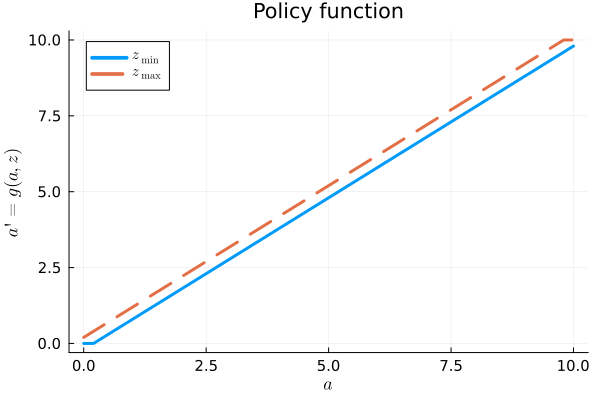

In [162]:
# plot policy functions
using Plots
using LaTeXStrings

plot(a, g[:,1];
     title = "Policy function",
     xlabel = L"a",
     ylabel = L"a' = g(a,z)",
     linewidth = 3,
     guidefont = font(12),
     tickfont = font(10),
     legendfont = font(10),
     label = L"z_{\min}")          

plot!(a, g[:,end];
     linewidth = 3,
     linestyle = :dash,
     label = L"z_{\max}")   

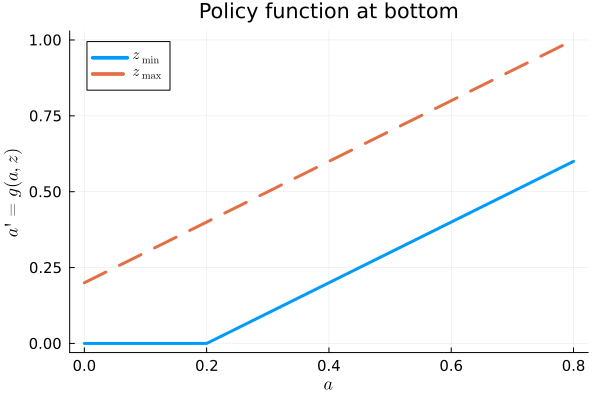

In [167]:
# plot policy functions (zooming into bottom)
plot(a[1:5], g[1:5,1];
     title = "Policy function at bottom",
     xlabel = L"a",
     ylabel = L"a' = g(a,z)",
     linewidth = 3,
     guidefont = font(12),
     tickfont = font(10),
     legendfont = font(10),
     label = L"z_{\min}")          

plot!(a[1:5], g[1:5,end];
     linewidth = 3,
     linestyle = :dash,
     label = L"z_{\max}") 

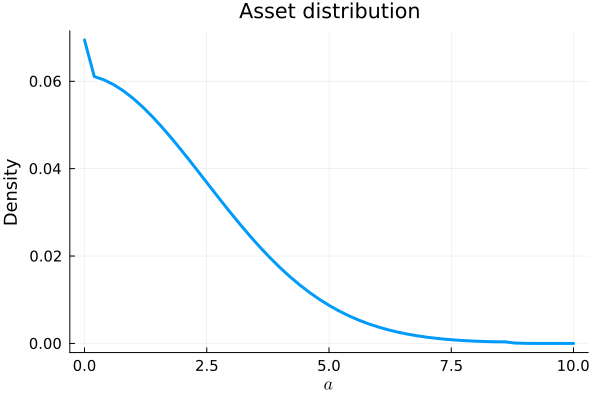

In [165]:
# asset distribution 
plot(a, ma;
     title = "Asset distribution",
     xlabel = L"a",
     ylabel = "Density",
     linewidth = 3,
     guidefont = font(12),
     tickfont = font(10),
     legendfont = font(10),
     label = "")